In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"munibarafique","key":"f69666f1939cc576145c7e0456563332"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d dansbecker/food-101

Dataset URL: https://www.kaggle.com/datasets/dansbecker/food-101
License(s): other
100% 9.37G/9.38G [01:41<00:00, 153MB/s]
100% 9.38G/9.38G [01:41<00:00, 99.1MB/s]


In [ ]:
!unzip food-101.zip

Streaming output truncated to the last 5000 lines.
  inflating: food-101/food-101/images/baklava/1414588.jpg  
  inflating: food-101/food-101/images/baklava/1414809.jpg  
  inflating: food-101/food-101/images/baklava/1417138.jpg  
  inflating: food-101/food-101/images/baklava/1418369.jpg  
  inflating: food-101/food-101/images/baklava/1421372.jpg  
  inflating: food-101/food-101/images/baklava/1432026.jpg  
  inflating: food-101/food-101/images/baklava/143372.jpg  
  inflating: food-101/food-101/images/baklava/1438216.jpg  
  inflating: food-101/food-101/images/baklava/1441766.jpg  
  inflating: food-101/food-101/images/baklava/1445917.jpg  
  inflating: food-101/food-101/images/baklava/1447310.jpg  
  inflating: food-101/food-101/images/baklava/1447402.jpg  
  inflating: food-101/food-101/images/baklava/1448425.jpg  
  inflating: food-101/food-101/images/baklava/1448904.jpg  
  inflating: food-101/food-101/images/baklava/1451510.jpg  
  inflating: food-101/food-101/images/baklava/1451

In [49]:
import os
dataset_dir = '/content/food-101/food-101/images'
categories = os.listdir(dataset_dir)
print(f"Categories: {categories[:5]}")

Categories: ['edamame', 'croque_madame', 'breakfast_burrito', 'peking_duck', 'caprese_salad']


In [50]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 80800 images belonging to 101 classes.
Found 20200 images belonging to 101 classes.


In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([

    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),

    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(101, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [52]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=1,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2525/2525 ━━━━━━━━━━━━━━━━━━━━ 2880s 1s/step - accuracy: 0.0298 - loss: 4.4873 - val_accuracy: 0.0770 - val_loss: 4.1210


In [53]:
model.save('food_classification_model.h5')

In [54]:
val_loss, val_acc = model.evaluate(validation_generator)
print(f"Validation Accuracy: {val_acc * 100:.2f}%")
print(f"Validation Loss: {val_loss:.4f}")

632/632 ━━━━━━━━━━━━━━━━━━━━ 222s 350ms/step - accuracy: 0.0786 - loss: 4.1130
Validation Accuracy: 7.70%
Validation Loss: 4.1211


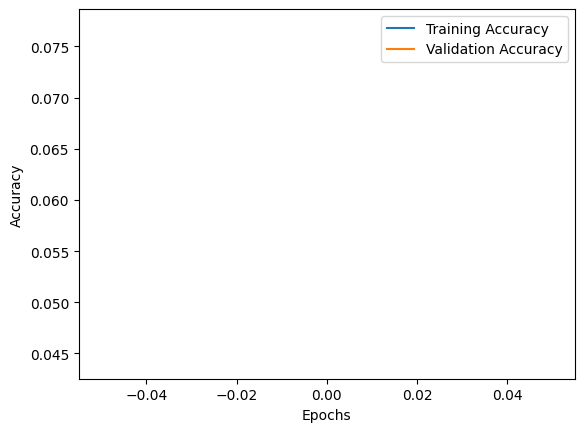

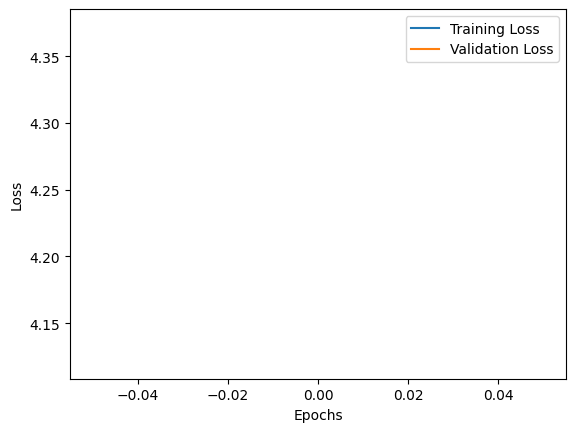

In [55]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [62]:
from tensorflow.keras.preprocessing import image
import numpy as np
import os

img_dir = '/content/food-101/food-101/images/bruschetta'
img_files = [os.path.join(img_dir, f) for f in os.listdir(img_dir) if os.path.isfile(os.path.join(img_dir, f))]

def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(128, 128))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

for img_path in img_files:
    img = load_and_preprocess_image(img_path)

    pred = model.predict(img)
    pred_class = np.argmax(pred)
    print(f"Predicted class: {list(train_generator.class_indices.keys())[pred_class]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step
Predicted class: chicken_wings
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
Predicted class: strawberry_shortcake
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
Predicted class: creme_brulee
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
Predicted class: beef_carpaccio
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
Predicted class: takoyaki
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
Predicted class: seaweed_salad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
Predicted class: pork_chop
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Predicted class: beef_carpaccio
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Predicted class: peking_duck
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Predicted class: onion_rings
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Predicted class: beignets
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Predicted class: cup_cakes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Predicted class: caesar_salad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Predicted class: sashimi
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Predicted class

In [64]:
calorie_dict = {
    'pizza': 266,
    'steak': 679,
    'apple_pie': 237,
}

food_class = list(train_generator.class_indices.keys())[pred_class]
estimated_calories = calorie_dict.get(food_class, "Unknown")
print(f"Estimated calorie content: {estimated_calories} kcal")

Estimated calorie content: Unknown kcal


In [65]:
print(f"Predicted class: {food_class}")

Predicted class: sashimi


In [66]:
calorie_dict = {
    'pizza': 266,
    'steak': 679,
    'apple_pie': 237,
    'burger': 354,
    'sushi': 200,
    'salad': 152,
    'fried_rice': 320,
    'spaghetti': 221,
}

estimated_calories = calorie_dict.get(food_class, "Unknown")
print(f"Estimated calorie content: {estimated_calories} kcal")

Estimated calorie content: Unknown kcal


In [67]:
print(f"Predicted food class: {food_class}")

Predicted food class: sashimi


In [68]:
print(f"Class indices: {train_generator.class_indices}")

Class indices: {'apple_pie': 0, 'baby_back_ribs': 1, 'baklava': 2, 'beef_carpaccio': 3, 'beef_tartare': 4, 'beet_salad': 5, 'beignets': 6, 'bibimbap': 7, 'bread_pudding': 8, 'breakfast_burrito': 9, 'bruschetta': 10, 'caesar_salad': 11, 'cannoli': 12, 'caprese_salad': 13, 'carrot_cake': 14, 'ceviche': 15, 'cheese_plate': 16, 'cheesecake': 17, 'chicken_curry': 18, 'chicken_quesadilla': 19, 'chicken_wings': 20, 'chocolate_cake': 21, 'chocolate_mousse': 22, 'churros': 23, 'clam_chowder': 24, 'club_sandwich': 25, 'crab_cakes': 26, 'creme_brulee': 27, 'croque_madame': 28, 'cup_cakes': 29, 'deviled_eggs': 30, 'donuts': 31, 'dumplings': 32, 'edamame': 33, 'eggs_benedict': 34, 'escargots': 35, 'falafel': 36, 'filet_mignon': 37, 'fish_and_chips': 38, 'foie_gras': 39, 'french_fries': 40, 'french_onion_soup': 41, 'french_toast': 42, 'fried_calamari': 43, 'fried_rice': 44, 'frozen_yogurt': 45, 'garlic_bread': 46, 'gnocchi': 47, 'greek_salad': 48, 'grilled_cheese_sandwich': 49, 'grilled_salmon': 50,

In [69]:
calorie_dict = {
    'pizza': 266,
    'steak': 679,
    'apple_pie': 237,
    'burger': 354,
    'sushi': 200,
    'salad': 152,
    'fried_rice': 320,
    'spaghetti': 221,
}

In [70]:
estimated_calories = calorie_dict.get(food_class, "Unknown")
print(f"Estimated calorie content: {estimated_calories} kcal")

Estimated calorie content: Unknown kcal


In [71]:
print(f"Predicted food class: {food_class}")

Predicted food class: sashimi


In [72]:
print(f"Class indices: {train_generator.class_indices}")

Class indices: {'apple_pie': 0, 'baby_back_ribs': 1, 'baklava': 2, 'beef_carpaccio': 3, 'beef_tartare': 4, 'beet_salad': 5, 'beignets': 6, 'bibimbap': 7, 'bread_pudding': 8, 'breakfast_burrito': 9, 'bruschetta': 10, 'caesar_salad': 11, 'cannoli': 12, 'caprese_salad': 13, 'carrot_cake': 14, 'ceviche': 15, 'cheese_plate': 16, 'cheesecake': 17, 'chicken_curry': 18, 'chicken_quesadilla': 19, 'chicken_wings': 20, 'chocolate_cake': 21, 'chocolate_mousse': 22, 'churros': 23, 'clam_chowder': 24, 'club_sandwich': 25, 'crab_cakes': 26, 'creme_brulee': 27, 'croque_madame': 28, 'cup_cakes': 29, 'deviled_eggs': 30, 'donuts': 31, 'dumplings': 32, 'edamame': 33, 'eggs_benedict': 34, 'escargots': 35, 'falafel': 36, 'filet_mignon': 37, 'fish_and_chips': 38, 'foie_gras': 39, 'french_fries': 40, 'french_onion_soup': 41, 'french_toast': 42, 'fried_calamari': 43, 'fried_rice': 44, 'frozen_yogurt': 45, 'garlic_bread': 46, 'gnocchi': 47, 'greek_salad': 48, 'grilled_cheese_sandwich': 49, 'grilled_salmon': 50,

In [74]:
{'pizza_class': 0, 'steak_class': 1, 'apple_pie_class': 2}

{'pizza_class': 0, 'steak_class': 1, 'apple_pie_class': 2}

In [75]:
calorie_dict = {
    'pizza_class': 266,
    'steak_class': 679,
    'apple_pie_class': 237,
    'burger_class': 354,
    'sushi_class': 200,
    'salad_class': 152,
    'fried_rice_class': 320,
    'spaghetti_class': 221,
}

In [76]:
estimated_calories = calorie_dict.get(food_class, "Unknown")
print(f"Estimated calorie content: {estimated_calories} kcal")

Estimated calorie content: Unknown kcal


In [77]:
food_class = food_class.strip().lower()